Up until this point, we have used the `bcs` package extensively to design chimeric type I PKSs with varying numbers of modules and diverse domain architectures within each module. We have also experimented with building PKSs using different starter and extender units. Recall that `RetroTide` and also, `structureDB` within `RetroTide`, both rely on the `bcs` package for molecule design. Our objective is always to give users as much flexibility as they would need and there would certainly be some users who when using `RetroTide` to build a target, may not actually wish to use the full suite of starter and extender units available in `bcs`.

Consequently, in this notebook, we will explore how to select only a list of starters and extenders that users may be interested in and to discard the rest.

In [4]:
import bcs
from typing import Optional, List

When the `bcs` package is imported, there is a function within `bcs`, which is `set_starters_extenders`, that creates a dictionary of `starters` and a dictionary of `extenders`. These are global dictionaries and can also be accessed outside the `bcs` package from this script via `bcs.starters` and `bcs.extenders`

In [5]:
bcs.starters

{'Methylmalonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5040>,
 'Malonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5120>,
 'Hydroxymalonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d50b0>,
 'butmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5190>,
 'mxmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5200>,
 'cemal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5270>,
 'Acetyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d52e0>,
 'prop': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5350>,
 'isobut': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d53c0>,
 '2metbut': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5430>,
 'CHC-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d54a0>,
 'trans-1,2-CPDA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5510>,
 'cyclopentene': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5580>,
 'pyr': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d55f0>,
 'cin': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5660>,
 'AHBA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d56d0>,
 'isoval': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5740>,
 'PABA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5

In [6]:
bcs.extenders

{'Malonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5dd0>,
 'Methylmalonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5d60>,
 'mxmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5c80>,
 'emal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5e40>,
 'allylmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5eb0>,
 'butmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5f20>,
 'hmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5f90>,
 'isobutmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d6040>,
 'D-isobutmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d60b0>,
 'DCP': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d6120>,
 'hexmal': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d6190>}

In order to modify the list of starters and extenders available globally to the `bcs` state within this script, we can simply remove key-value pairs corresponding to starters and extenders that we don't want from the `bcs.starters` and `bcs.extenders` dictionary. We can write a custom function to do this as follows:

In [7]:
def modify_bcs_starters_extenders(starter_codes: Optional[List[str]] = None, extender_codes: Optional[List[str]] = None):
    
    for key in list(bcs.starters.keys()):
        if key not in starter_codes:
            bcs.starters.pop(key, None) # removes key corresponding to the starter code that was not specified
            
    for key in list(bcs.extenders.keys()):
        if key not in extender_codes:
            bcs.extenders.pop(key, None) # same as above but for extenders

As a bit of an extreme example, let's remove all starters and extenders other than malonyl-CoA and methylmalonyl-CoA

In [8]:
modify_bcs_starters_extenders(starter_codes = ["Malonyl-CoA", "Methylmalonyl-CoA"], 
                              extender_codes = ["Malonyl-CoA", "Methylmalonyl-CoA"])

In [9]:
bcs.starters

{'Methylmalonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5040>,
 'Malonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5120>}

In [10]:
bcs.extenders

{'Malonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5dd0>,
 'Methylmalonyl-CoA': <rdkit.Chem.rdchem.Mol at 0x7fd1c71d5d60>}

Once the starter and extender units available have been modified, **we do not need to reimport the `bcs` package**. This is because when a user mutates the global dictionaries `bcs.starters` and `bcs.extenders`, this also modifies the global state of the module during runtime. The only reason we might want to reimport `bcs` would be if we accidentally removed more starter and extender units then intended. In this scenario, it might be best to just restart kernel. 

As for `structureDB` and `retrotide`, however, **these should only be imported AFTER `bcs.starters` and `bcs.extenders` have been modified. Upon running the cell below, notice that `structureDB` has a lot fewer key-value pairs than we might have observed in previous notebooks and that these only comprise Malonyl-CoA and Methylmalonyl-CoA.

In [11]:
from retrotide import retrotide, structureDB

































["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'A2'}", 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'C2'}", 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: False']
["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'A1'}", 'loading: False']
["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'A'}", 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']
["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']
["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']


And sure enough, if we now try to build a bcs cluster with a starter unit that is not Malonyl-CoA or Methylmalonyl-CoA, we will run into an error:

In [12]:
loading_AT_domain = bcs.AT(active = True, substrate = "Hydroxymalonyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

mod1_AT_domain = bcs.AT(active = True, substrate = "Methylmalonyl-CoA")
module1 = bcs.Module(domains = {bcs.AT: mod1_AT_domain}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

KeyError: 'Hydroxymalonyl-CoA'

Meanwhile, building bcs clusters with starters and extenders that are either Malonyl-CoA or Methylmalonyl-CoA still works!

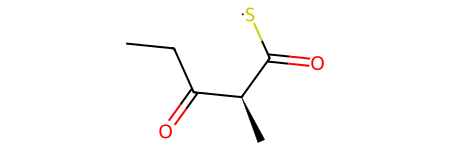

In [13]:
loading_AT_domain = bcs.AT(active = True, substrate = "Methylmalonyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

mod1_AT_domain = bcs.AT(active = True, substrate = "Methylmalonyl-CoA")
module1 = bcs.Module(domains = {bcs.AT: mod1_AT_domain}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)